In [1]:
import numpy as np
from tqdm import tqdm

from src.visualization import plot_result
from src.algorithms import LocalSearchTSP, CandidateSteepestLocalSearchTSP

In [2]:
def pretty_print(algorithm, values):
    min_time, max_time, avg_time, minv, maxv, avgv = values
    print(f'Algorithm: {algorithm}:')
    print(f'    objective: {avgv}({int(minv)} - {int(maxv)})')
    print(f'    times: {avg_time}({min_time} - {max_time})')
    print('========================================================')

In [3]:
def experiments(node_path):
    nodes_instance = np.genfromtxt(node_path, dtype=int, delimiter=';')
    algorithms = {'steepest_local_search_edges_random': LocalSearchTSP('steepest', node_path, 'edges', 'random'), 'steepest_local_search_edges_random_candidate': CandidateSteepestLocalSearchTSP(node_path, k=10)}
    results = {}
    for key, algorithm in tqdm(algorithms.items()):
        result = algorithm.run_experiment()
        results[key] = result

    for key, result in results.items():
        values = result[:-2]
        pretty_print(key, values)

    for key, result in results.items():
        minv, path = result[3], result[-2]
        plot_result(nodes_instance, path, minv)
        print('===============================================================')

# Instance C

100%|██████████| 2/2 [09:06<00:00, 273.15s/it]

Algorithm: steepest_local_search_edges_random:
    objective: 51685.88(48931 - 54505)
    times: 2.3701542949676515(1.954164981842041 - 5.030106067657471)
Algorithm: steepest_local_search_edges_random_candidate:
    objective: 73855.58(63085 - 89073)
    times: 0.42386409640312195(0.31716489791870117 - 0.5482079982757568)


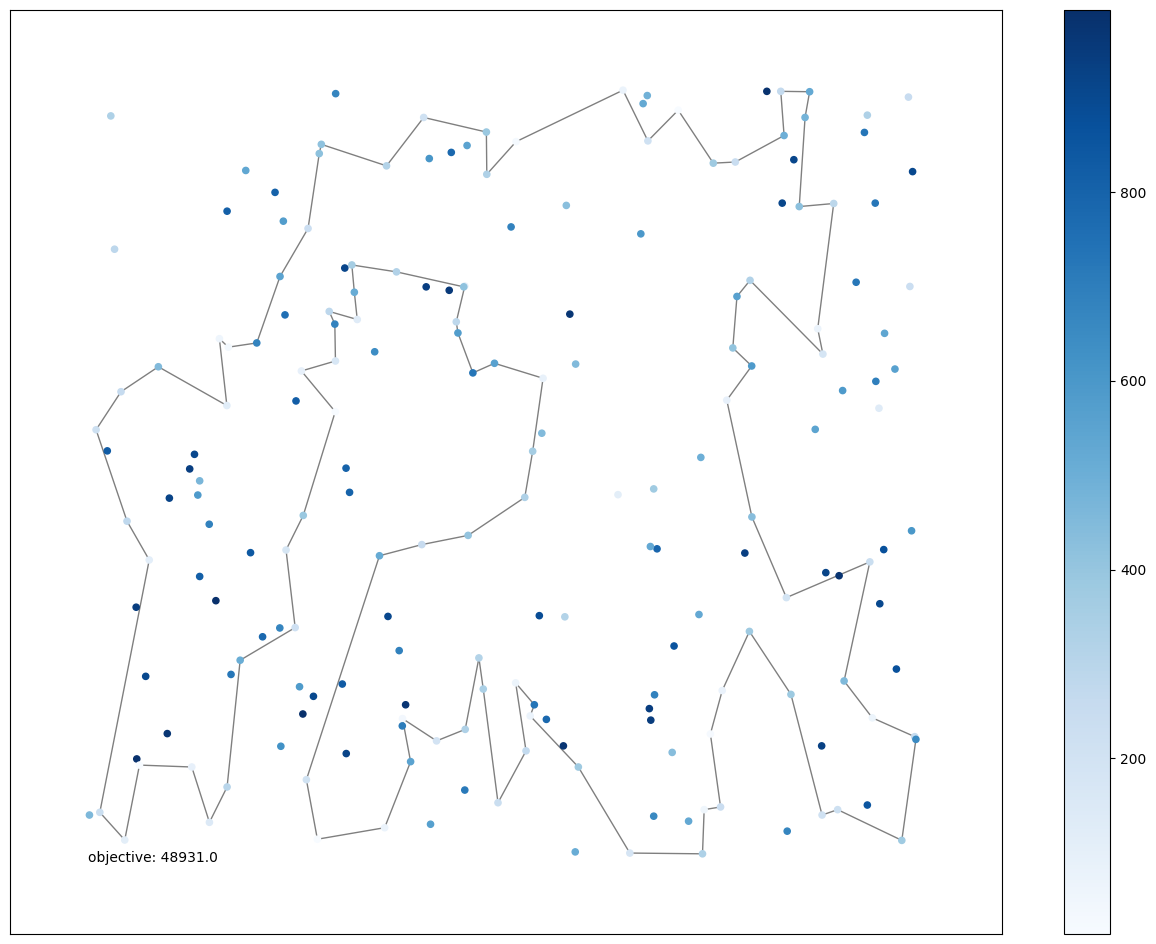

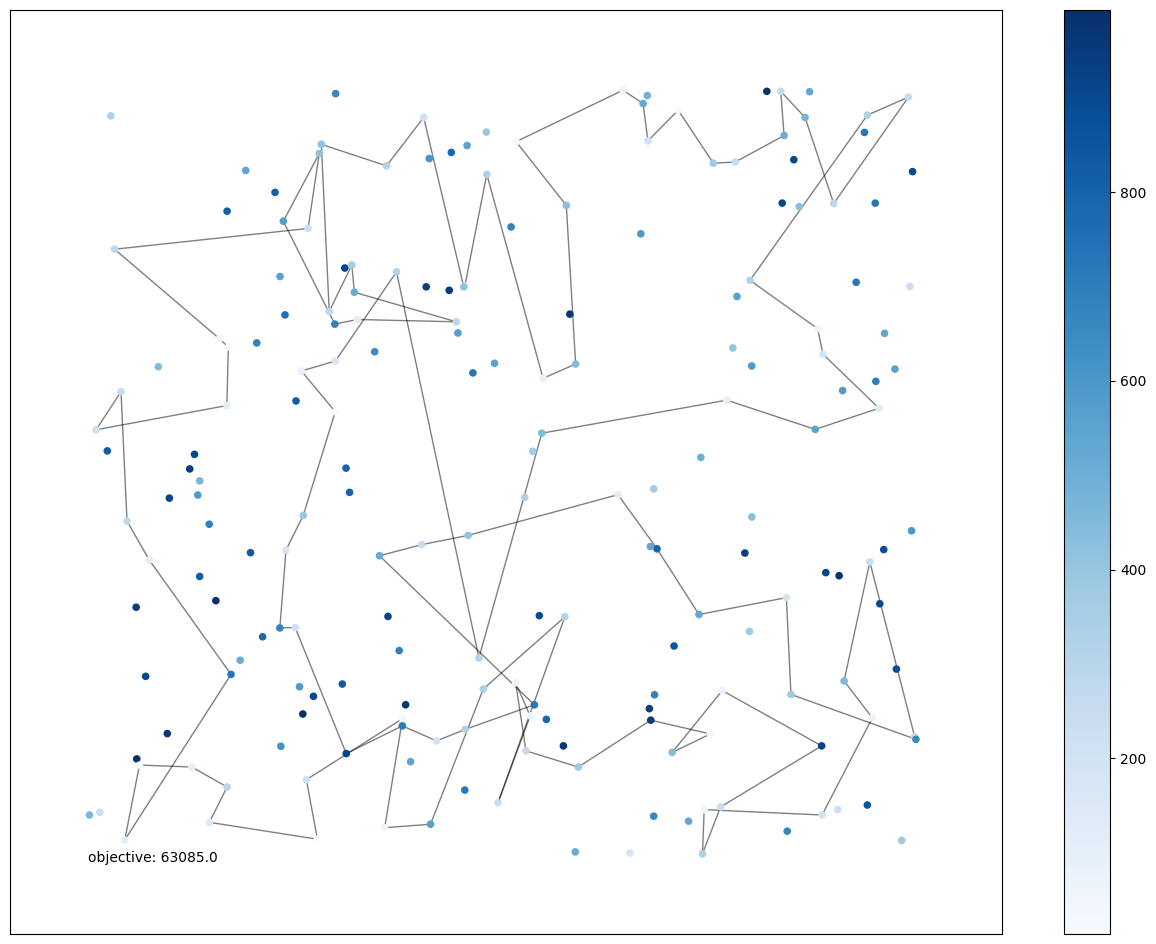

In [4]:
node_path_C = '../data/TSPC.csv'
experiments(node_path_C)

# Instance D

100%|██████████| 2/2 [09:10<00:00, 275.03s/it]

Algorithm: steepest_local_search_edges_random:
    objective: 48453.71(45911 - 52169)
    times: 2.3713489460945127(1.9308738708496094 - 2.764481544494629)
Algorithm: steepest_local_search_edges_random_candidate:
    objective: 71028.21(59700 - 88833)
    times: 0.3921493422985077(0.2762472629547119 - 0.5058159828186035)


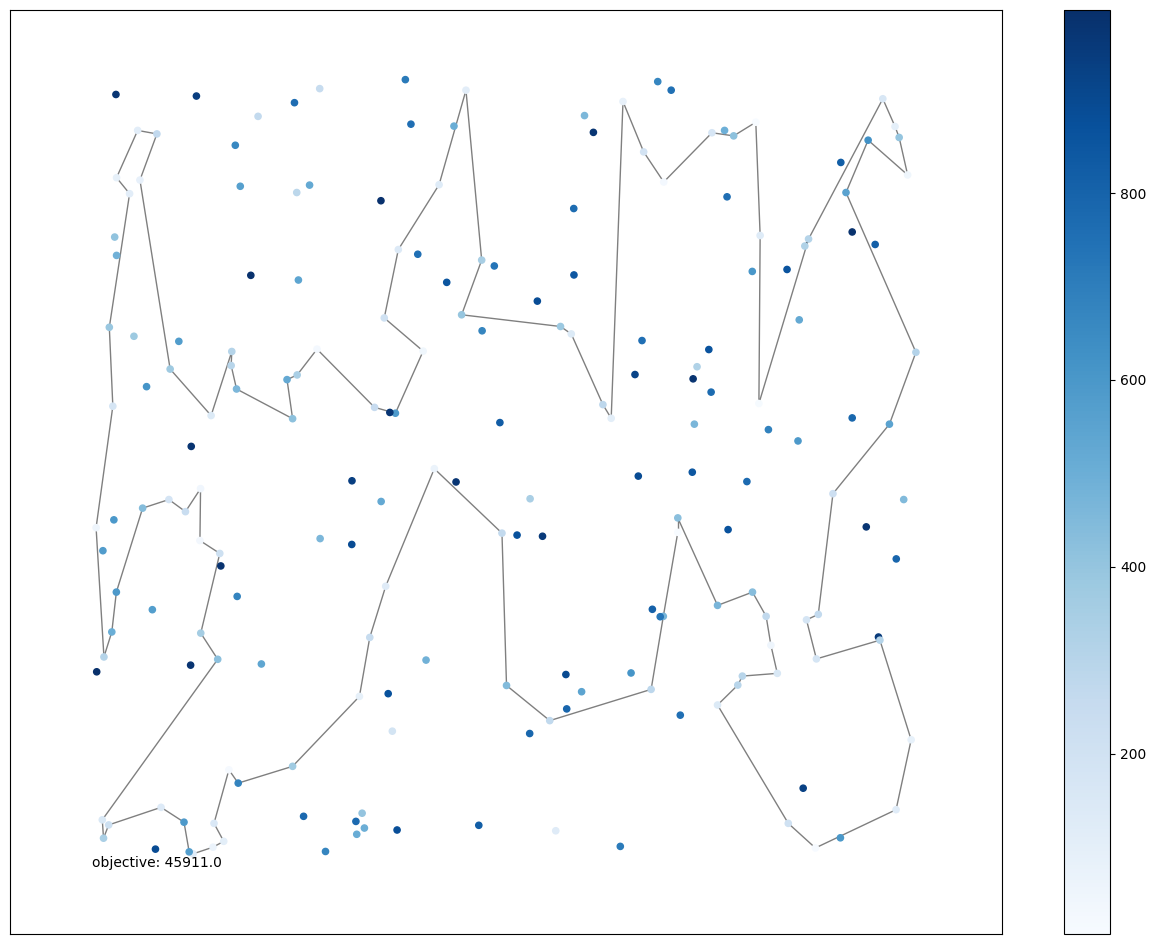

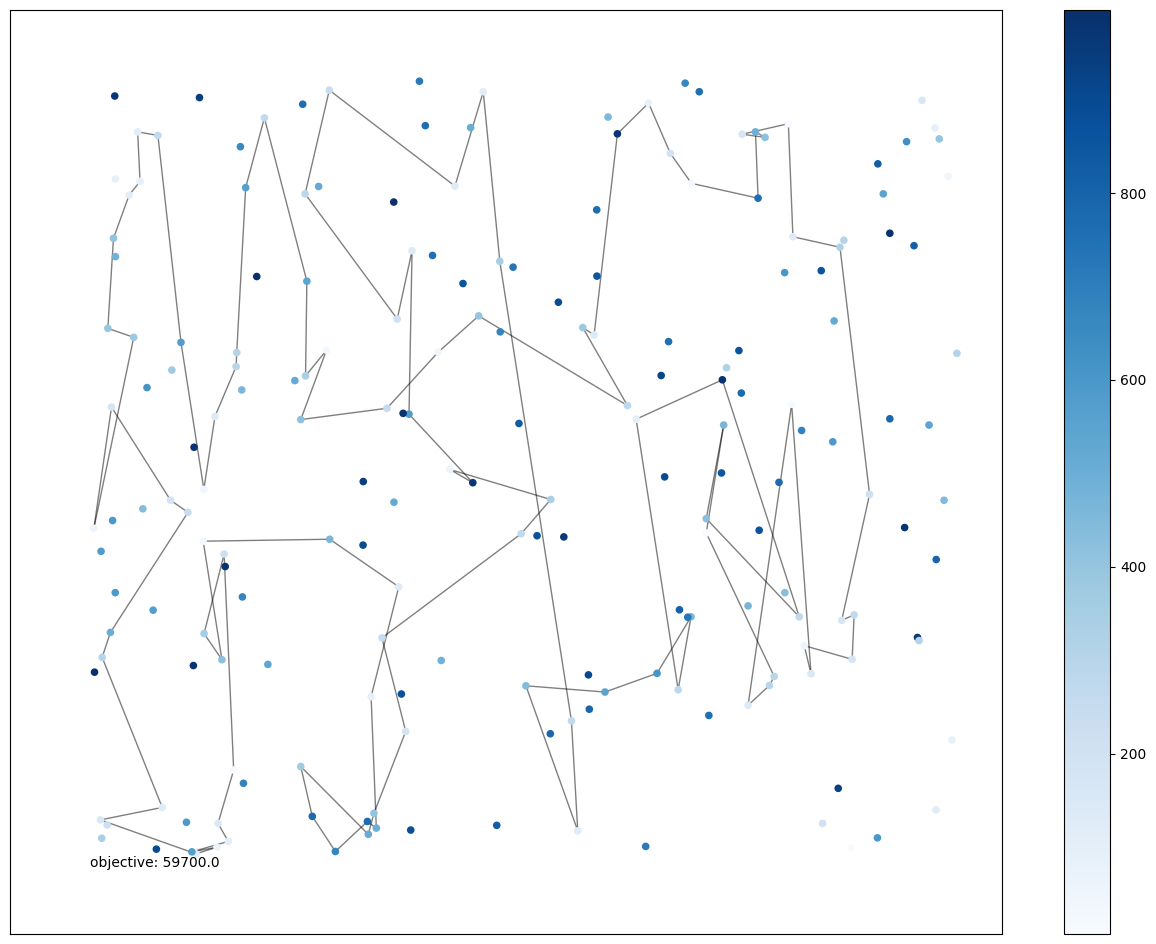

In [5]:
node_path_D = '../data/TSPD.csv'
experiments(node_path_D)